In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

directory = '/content/drive/MyDrive/sales_data/'

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

dataframes = {}

# Read each CSV file and store it in the dictionary
for file in csv_files:
    file_path = os.path.join(directory, file)
    dataframe_name = os.path.splitext(file)[0]
    dataframes[dataframe_name] = pd.read_csv(file_path)



In [4]:
df= pd.concat(dataframes.values(), ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [5]:
# df.to_csv("all_df.csv",index=False)

In [6]:
df.shape

(186850, 6)

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# Clean Data

In [8]:
nan_df=df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df.dropna(how="all")

In [10]:
df=df[df["Order Date"].str[0:2]!="Or"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [11]:
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"])
df["Price Each"]=pd.to_numeric(df["Price Each"])

In [12]:
df["Month"]=df["Order Date"].str[0:2]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07


In [13]:
df["Month"]=df["Month"].astype("int32")

In [14]:
df["Sale"]=df["Quantity Ordered"]*df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [15]:
def get_city(address):
  return address.split(",")[1]
def get_state(address):
  return address.split(",")[2].split(" ")[1]


In [16]:
df["City"]=df["Purchase Address"].apply(lambda x:get_city(x)+" "+ get_state(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA


In [17]:
tf=df.groupby("Month").sum()
tf.head()

<ipython-input-17-8403e2c4544a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tf=df.groupby("Month").sum()


,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


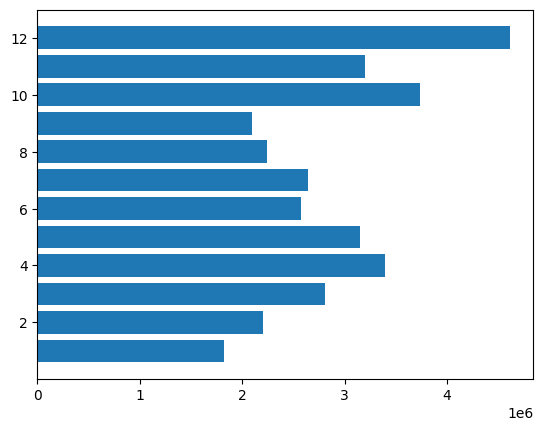

In [18]:

month=range(1,13)
plt.barh(month,tf["Sale"])
plt.show()

# what city had the highest number sales??

In [19]:
results=df.groupby("City").sum()
results

<ipython-input-19-024407dee622>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=df.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


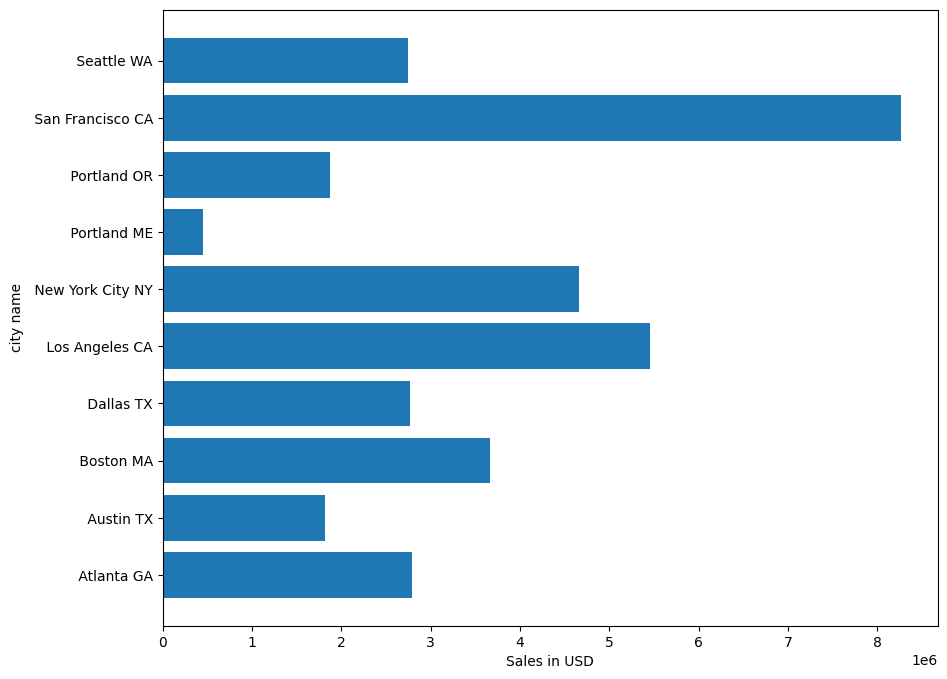

In [20]:
city=[city for city,df in df.groupby("City")]
plt.figure(figsize=(10,8))
plt.barh(city,results["Sale"])
plt.ylabel("city name")
plt.xlabel("Sales in USD")
plt.show()

# what time should we display ad to maximize likelihood of customers buying product???

In [21]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [22]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df["Order Date"].dt.minute

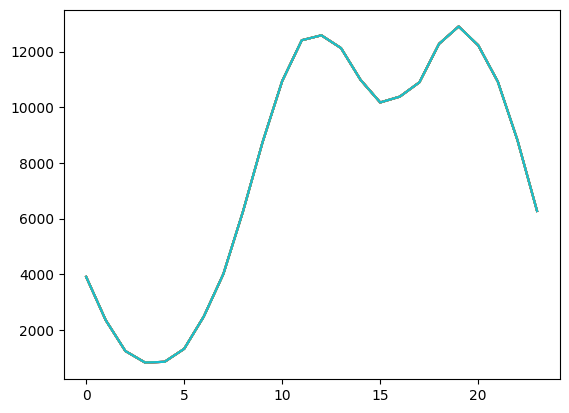

In [23]:
hours=[hour for hour,df in df.groupby("Hour")]
plt.plot(hours,df.groupby(["Hour"]).count())
plt.show()

#  what products are most often sold together???





In [28]:
sold_most=df[df["Order ID"].duplicated(keep=False)]
sold_most

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
118,223028,Vareebadd Phone,1,400.00,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco CA,10,21
119,223028,USB-C Charging Cable,2,11.95,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco CA,10,21
120,223028,Wired Headphones,1,11.99,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco CA,10,21
140,223048,Vareebadd Phone,1,400.00,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,400.00,Portland OR,17,19
141,223048,USB-C Charging Cable,2,11.95,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,23.90,Portland OR,17,19
...,...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,2019-10-07 18:18:00,"942 11th St, San Francisco, CA 94016",10,11.95,San Francisco CA,18,18
186760,278710,USB-C Charging Cable,1,11.95,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco CA,19,5
186761,278710,27in FHD Monitor,1,149.99,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,149.99,San Francisco CA,19,5
186769,278718,USB-C Charging Cable,1,11.95,2019-10-13 12:45:00,"479 Lincoln St, Atlanta, GA 30301",10,11.95,Atlanta GA,12,45


In [31]:
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Grouped
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA,16,51,Apple Airpods Headphones
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA,8,55,Flatscreen TV
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA,12,41,AA Batteries (4-pack)
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA,10,15,AA Batteries (4-pack)
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA,2,13,AAA Batteries (4-pack)


In [33]:
df=df[["Order ID","Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
0,222910,Apple Airpods Headphones
1,222911,Flatscreen TV
2,222912,AA Batteries (4-pack)
3,222913,AA Batteries (4-pack)
4,222914,AAA Batteries (4-pack)


In [38]:
from itertools import combinations
from collections import Counter
count=Counter()

In [39]:
for row in df["Grouped"]:
  row_list=row.split(",")
  count.update(Counter(combinations(row_list,2)))

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [40]:
for key,value in count.most_common(20):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin